EJERCICIO 1:
DERIVACIÓN NUMÉRICA

In [1]:
#Este ejercicio busca que usted implemente correctamente dos métodos de derivación numérica: forward difference y central difference.
#Pruebe distintos valores de h (que equivale a distintos valores de M).

import numpy as np
import matplotlib.pylab as plt

# Función a derivar
def funcion(x1):
    	return np.cos(x1)


In [2]:
#El intervalo de integración es de 0 a 2pi.
#Divida el intervalo de integración en M secciones para calcular sus derivadas.
#pruebe distintos valores de M

# paso 1: use linespace (ver documentación: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
# para hacer el arreglo de su intervalo en x
M=9999
a=0
b=2.0*np.pi

x = np.linspace(a,b, num=M)
print(x)


#paso 2: genere el arreglo de valores de su función fx:

fx = funcion(x)
print(fx)


[0.00000000e+00 6.28444220e-04 1.25688844e-03 ... 6.28192842e+00
 6.28255686e+00 6.28318531e+00]
[1.         0.9999998  0.99999921 ... 0.99999921 0.9999998  1.        ]


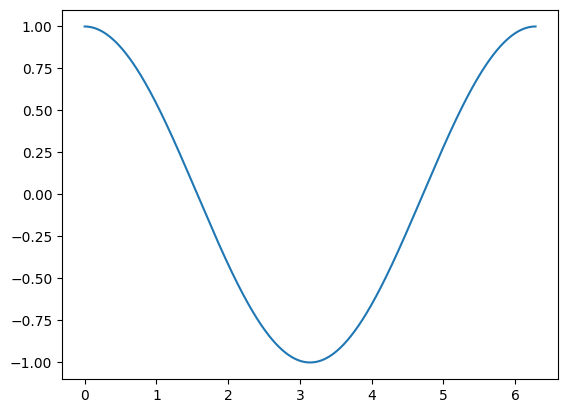

In [3]:
#1) grafique su función para verificar que hizo bien los pasos anteriores


import matplotlib.pyplot as plt

plt.plot(x,fx)



In [4]:
# 2a). Implemente el algoritmo que le permita calcular la derivada de la función para los puntos en el intervalo 0 a 2pi usando forward difference.

h=(b-a)/M
forward_difference = (fx[1:]-fx[0:-1])/h
print(forward_difference)


[-0.00031425 -0.00094276 -0.00157127 ...  0.00157127  0.00094276
  0.00031425]


In [5]:
# 2b). Implemente el algoritmo que le permita calcular la derivada de la función para los puntos en el intervalo 0 a 2pi usando diferencia central.

central_difference = (fx[2:]-fx[0:-2])/(2*h)
print(central_difference)

[-0.00062851 -0.00125701 -0.00188552 ...  0.00188552  0.00125701
  0.00062851]


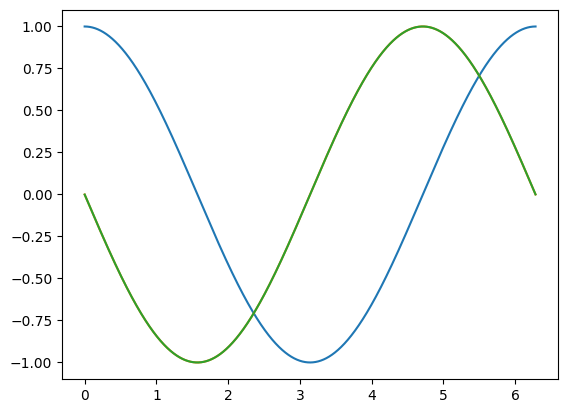

In [6]:
# 2c). Haga una gráfica de la función y sus derivadas obtenidas usando los dos métodos antes mencionados.

plt.plot(x,fx, label="$f(x)$")
plt.plot(x[0:-1],forward_difference, label="forward_difference")
plt.plot(x[1:-1],central_difference, label="central_difference")

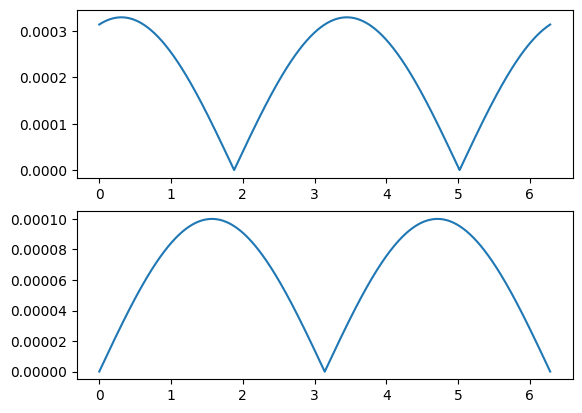

In [7]:
# 2d). Haga una grafica con dos subplots (uno por cada metodo) del error |(valor numérico - valor analitico) en el intervalo.

fig, (ax1, ax2) = plt.subplots(2,1)

error_forward_difference = np.abs(forward_difference-(-np.sin(x[:-1])))
error_central_difference = np.abs(central_difference-(-np.sin(x[1:-1])))

ax1.plot(x[:-1],error_forward_difference)
ax2.plot(x[1:-1],error_central_difference)

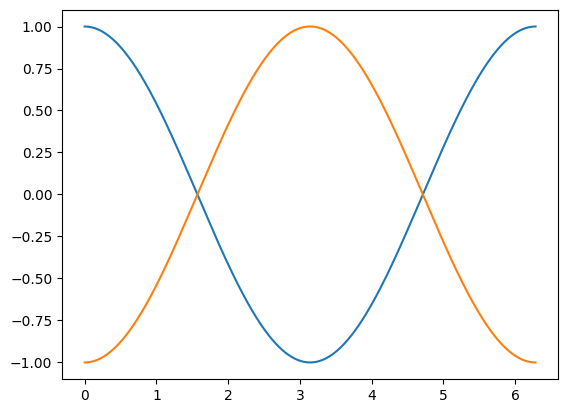

In [24]:
# 2e). Implemente el algoritmo que le permita calcular la segunda derivada de la función en el intervalo 0 a 2pi. Haga una gráfica de la función y su segunda derivada.

segunda_derivada=(fx[2:]+fx[:-2]-2*fx[1:-1])/(h**2)

plt.plot(x,fx)
plt.plot(x[1:-1],segunda_derivada)

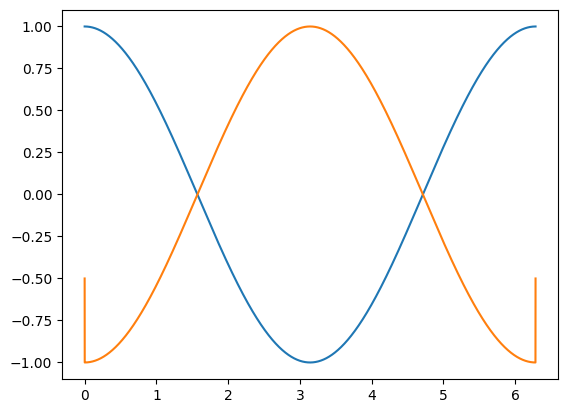

In [41]:
# 3) (opcional si terminan el ejercicio 2) Repita el ejercicio anterior usando algunos de los métodos de las librerías de scipy
# https://docs.scipy.org/doc/scipy/tutorial/integrate.html

#Usaré la librería de numpy.gradient para comparar los métodos, pues la página apunta a métodos de integración, que no vienen al caso en este ejercicio de derivación.

plt.plot(x,fx)
plt.plot(x,np.gradient(np.gradient(fx,x),x)) #¿Por qué se ven esos picos?


EJERCICIO 2: NEWTON-RAPHSON

In [10]:
# La idea de este ejercicio es que exploren la convergencia del método de Newton-Raphson para encontrar los ceros del siguiente polinomio:

def poli(x):
    	return  (x**5)-(1.7*x**4)-(10.0*x**3)+(20.0*x*x)+ (9.0*x)-18.0


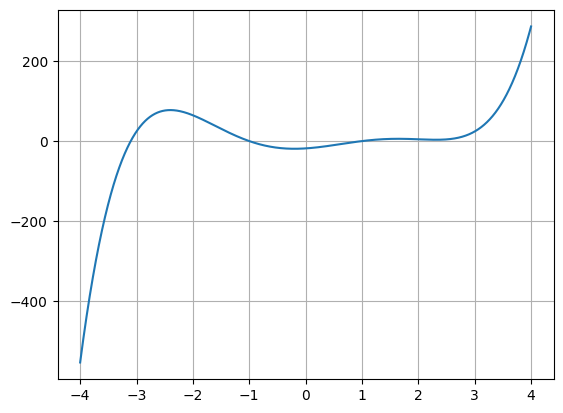

In [45]:
# Para esto:
# 1a.)  Haga una grafica del polinomio en el intervalo [-4:4].
x = np.linspace(-4,4,M)
fx=poli(x)
plt.plot(x,fx)
plt.grid(True)

In [111]:
# 1b.) Usando su implementación de Newton-Raphson, imprima el valor de una raíz x0_r del polinomio encontrada si usa como x_guess inicial el valor -2.35.
#Imprima el valor de x0_r encontrado y de f(x0_r)

def poli_derivada(x):
  return  5*(x**4)-(4*1.7*x**3)-(3*10.0*x**2)+(2*20.0*x)+ (9.0)

def newton_Raphson(x_guess):

  x_0=x_guess
  x_1=x_0-poli(x_0)/poli_derivada(x_0)
  i=0
  while(np.abs(x_1-x_0)>1e-10):
    x_0=x_1
    x_1=x_0-poli(x_0)/poli_derivada(x_0)
    i=i+1

  return x_1, i

newton_Raphson(-2.35)

(0.9827328987557328, 27)

Se encontraron 1000 raíces.
Se registraron 1000 conteos de iteraciones.


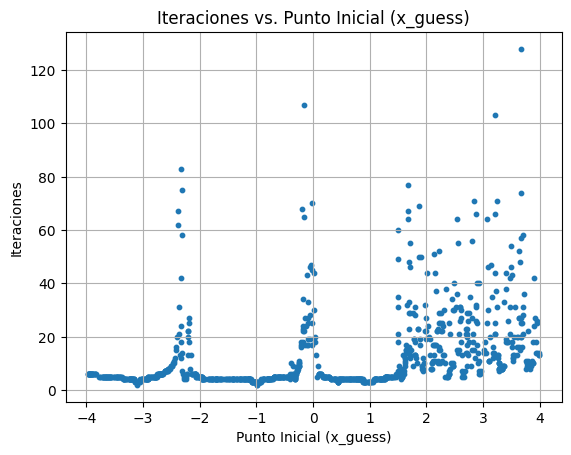

In [126]:
# 1c.) Repita lo anterior para 1000 valores de x_guess generados aleatoriamente en el intervalo [-4:4].
#Cuente cuantas iteraciones necesita su codigo para encontrar una raiz x_r del polinomio (tal que $f(x_r) sea menor a 10^{-10} para cada x_guess.
#Haga una grafica (use un scatter) del numero de iteraciones en funcion del x_guess inicial.

x_guesses = -4+np.random.random(1000)*8

raices_encontradas=[]
iteraciones_necesarias=[]
for guess in x_guesses:
  raiz, iteraciones = newton_Raphson(guess)
  raices_encontradas.append(raiz)
  iteraciones_necesarias.append(iteraciones)


print(f"Se encontraron {len(raices_encontradas)} raíces.")
print(f"Se registraron {len(iteraciones_necesarias)} conteos de iteraciones.")

plt.scatter(x_guesses,np.array(iteraciones_necesarias),s=10)

# Añadir títulos y etiquetas
plt.title('Iteraciones vs. Punto Inicial (x_guess)')
plt.xlabel('Punto Inicial (x_guess)')
plt.ylabel('Iteraciones')
plt.grid(True) # Añade una cuadrícula para facilitar la lectura

plt.show() # Muestra la gráfica

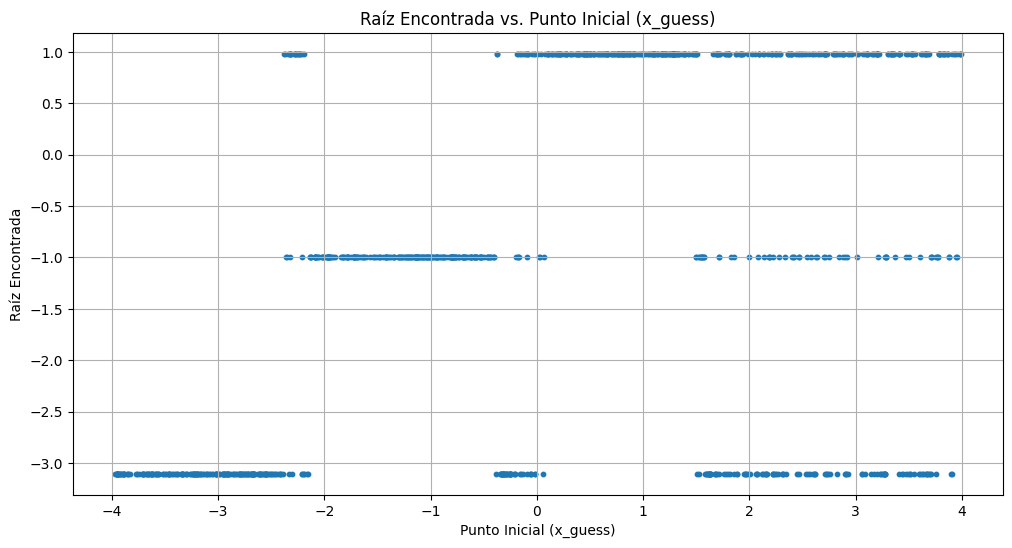

In [127]:
# 1c.) Haga una grafica (use un scatter) de la raíz encontrada (en el eje y) en función del x_guess inicial (en el eje x).

plt.figure(figsize=(12, 6)) # Crea una nueva figura para la segunda gráfica
plt.scatter(x_guesses, raices_encontradas, s=10) # 's' controla el tamaño de los puntos

# Añadir títulos y etiquetas
plt.title('Raíz Encontrada vs. Punto Inicial (x_guess)')
plt.xlabel('Punto Inicial (x_guess)')
plt.ylabel('Raíz Encontrada')
plt.grid(True) # Añade una cuadrícula para facilitar la lectura

plt.show() # Muestra la gráfica

In [128]:
# 1d.) Imprima un mensaje en donde explique por que cree que para ciertos valores de x_guess el numero de iteraciones necesarios para encontrar la raiz es mayor.
#Ademas haga un analisis y describa que pasa con los valores de x_r encontrados en esos puntos "problema" comprados con los encontrados para otros valores de x_guess.

print("Parece tardar más cuando la derivada es muy cercana a cero, donde hay máximos y mínimos")
print("Cerca de los puntos 'problema', la raiz puede dar muy lejana a este punto ya que la derivada es muy pequeña o cercana a cero")

Parece tardar más cuando la derivada es muy cercana a cero, donde hay máximos y mínimos
Cerca de los puntos 'problema', la raiz puede dar muy lejana a este punto ya que la derivada es muy pequeña o cercana a cero
